# EDA sopotify 


In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import prince

# leer dastet

In [87]:
data = pd.read_csv("../data/0_raw/spotify_dataset.csv", sep=",", encoding="utf-8")
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Anlsisi descriptivos

In [88]:
data.shape

(114000, 21)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Que es la columna de Unnamed:0? 


In [90]:
print(data.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


mostar lass filas en las que hace falta los datos 

In [91]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [92]:
data = data.dropna()

In [93]:
data.isnull().sum()


Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

hayd datos duplicados ?

In [94]:
data[data.duplicated(keep=False)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [95]:
print(data.describe(include="object"))

                      track_id      artists                  album_name  \
count                   113999       113999                      113999   
unique                   89740        31437                       46589   
top     6S3JlDAGk3uu3NtZbPnuhS  The Beatles  Alternative Christmas 2022   
freq                         9          279                         195   

             track_name track_genre  
count            113999      113999  
unique            73608         114  
top     Run Rudolph Run    acoustic  
freq                151        1000  


en track_id hay una varios que se repiten, eto no puede seer corectoir por uqe como es un id, no se peduen repetir, tien que tner los 114000 unicos, hay un pequeña insociostencia, opr otra lado loas artistas hya 8nucos 31437 segun la infromacion del datset puede haber artitas, albunes, nimbres del track y ele genro rerspetidos segundo la ifnoacmhnion optenida desde keegel, ahra lka oregyunta es cuakles son los id repitods y por que apso esto

In [96]:
data[data["track_id"] == "6S3JlDAGk3uu3NtZbPnuhS"]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8315,8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19759,19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34728,34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62226,62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
63087,63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock
82064,82064,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,power-pop
84129,84129,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,psych-rock
99727,99727,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,singer-songwriter
102732,102732,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,...,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,songwriter


In [97]:
data[data.duplicated(subset=["track_id"])]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.5770,...,-7.544,1,0.0438,0.2380,0.860000,0.0571,0.8430,90.522,4,afrobeat
2155,2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9000,...,-3.674,1,0.0499,0.1160,0.000017,0.1190,0.5990,104.655,4,alt-rock
3000,3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.5210,...,-9.461,1,0.0329,0.0678,0.149000,0.1230,0.3370,85.012,4,alternative
3002,3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.5680,...,-5.509,0,0.0300,0.0484,0.000417,0.2860,0.3700,93.986,4,alternative
3003,3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.8070,...,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,False,0.253,0.3590,...,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,False,0.490,0.2310,...,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,False,0.515,0.0736,...,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,False,0.624,0.1240,...,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


is hay duplicdos por que nosnos parecio desd eun pricio, ahroa vmaos a filtrarlos pero sin la columna de Unbamed: 0, ya que con esat columna nis da contexto, se puede crrer que es tipo de id que se le agerego pero ya esatba eol identifcados que de track_id, adeasm que unmed es un columan que va desde 0 hasta 113999, a lo que es incoherente si fuese un di ya que por defecto se comienza el conteop desde 1, pero  o se sabe con certazapara ues e sla coilumna, opor ahoira vamos a realizar el analisis descripoigvo sin esa columna

# Data filter

In [107]:
data_filter = data.drop(columns=["Unnamed: 0"])
data_filter

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [99]:
data_filter[data_filter.duplicated(keep=False)]


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1874,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2109,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3683,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112931,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish
113295,5WaioelSGekDk3UNQy8zaw,Matt Redman,Sing Like Never Before: The Essential Collection,Our God - New Recording,34,265373,False,0.487,0.895,11,-5.061,1,0.0413,0.000183,0.000000,0.3590,0.384,105.021,4,world-music


sin la ciouma de Unmed:0 si nos da el resulatdo de que hay datos dupluicados, adeams como ya habiasmoa visto con anterioridad hay trasck_id que satan respetido pero lo que cambia es el la variable de genero

ahora vamos a eliminar los datos duplicados. 

In [100]:
data_filter = data_filter.drop_duplicates()
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           113549 

In [101]:
data_filter.duplicated().sum()

0

In [102]:
print(data_filter.describe(include="object"))

                      track_id      artists                  album_name  \
count                   113549       113549                      113549   
unique                   89740        31437                       46589   
top     6S3JlDAGk3uu3NtZbPnuhS  The Beatles  Alternative Christmas 2022   
freq                         9          279                         195   

             track_name track_genre  
count            113549      113549  
unique            73608         114  
top     Run Rudolph Run    acoustic  
freq                151        1000  


In [103]:
track_id_counts = data_filter["track_id"].value_counts()
track_id_counts

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
2qgXrzJsry4KgYoJCpuaul    7
0RSGPiykniIg8m7JhiAVv7    7
                         ..
22Lhq4mVPFWv3bjchAFDOl    1
0oz9ITtPIt3iI1nzdVX9L2    1
1qFmSPALGSoqjbwM3br4Rl    1
1PTt5Oa80JGSBCrzzfhtn6    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: count, Length: 89740, dtype: int64

In [104]:
data_filter[data_filter["track_id"] == "6S3JlDAGk3uu3NtZbPnuhS"]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock
82064,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,power-pop
84129,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,psych-rock
99727,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,singer-songwriter
102732,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,songwriter


In [105]:
data_filter[data_filter["track_id"] == "2kkvB3RNRzwjFdGhaUA0tz"]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8262,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,blues
11170,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,british
19915,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,country
34974,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,folk
47257,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,hard-rock
84164,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,psych-rock
99875,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,singer-songwriter
102884,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,songwriter


In [ ]:
def group_genres_by_track_id(data_filter):
    """
    Group genres by track_id, combining unique track_genre values.

    Args:
        data_filter (pd.DataFrame): DataFrame with track_id, track_genre, etc.

    Returns:
        pd.DataFrame: DataFrame with track_genre combined per track_id.
    """
    def join_genres(df):
        return ", ".join(set(df["track_genre"]))

    # Agrupar por track_id y combinar géneros
    df_grouped = (
        data_filter.groupby("track_id")
        .agg({"track_genre": join_genres, **{col: "first" for col in data_filter.columns if col not in ["track_id", "track_genre"]}})
        .reset_index()
    )
    
    return df_grouped

data_filter = group_genres_by_track_id(data_filter)


KeyError: 'track_genre'

In [ ]:
data_filter[data_filter["track_id"] == "6S3JlDAGk3uu3NtZbPnuhS"]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8308,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19665,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34579,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
61957,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
62818,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock
81738,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,power-pop
83789,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,psych-rock
99288,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,singer-songwriter
102298,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,songwriter


In [ ]:
track_id_counts_after_group = data_filter["track_id"].value_counts()
track_id_counts_after_group

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
36NwMJRaCy7x77xYGJiG2M    7
54zCdkbIALAnv8Ihi3XWlD    7
                         ..
22Lhq4mVPFWv3bjchAFDOl    1
229lqwvjAJuDgRCkSXwOJm    1
1qFmSPALGSoqjbwM3br4Rl    1
1m9HqtwRcqKguKLS0a9HrI    1
6x8ZfSoqDjuNa5SVP5QjvX    1
Name: count, Length: 89740, dtype: int64

In [ ]:
data_filter[data_filter["track_id"] == "2syQ0f4SAQdzvlAewPl1DJ"]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
39364,2syQ0f4SAQdzvlAewPl1DJ,Zedd;Liam Payne,Get Low (with Liam Payne),Get Low (with Liam Payne),58,204583,False,0.718,0.926,1,-3.511,1,0.0494,0.027,0.000018,0.0513,0.54,108.018,4,german
108566,2syQ0f4SAQdzvlAewPl1DJ,Zedd;Liam Payne,Get Low (with Liam Payne),Get Low (with Liam Payne),57,204583,False,0.718,0.926,1,-3.511,1,0.0494,0.027,0.000018,0.0513,0.54,108.018,4,techno


In [ ]:
data_filter[data_filter["track_id"] == "0Pa0xSCRVO8ZIxs29XgBvv"]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
55491,0Pa0xSCRVO8ZIxs29XgBvv,Arijit Anand,Musafir,Musafir,45,244067,False,0.571,0.13,4,-14.136,1,0.0356,0.844,0.0,0.0833,0.385,131.568,3,indian
57390,0Pa0xSCRVO8ZIxs29XgBvv,Arijit Anand,Musafir,Musafir,45,244067,False,0.571,0.13,4,-14.136,1,0.0356,0.844,0.0,0.0833,0.385,131.568,3,indie
98770,0Pa0xSCRVO8ZIxs29XgBvv,Arijit Anand,Musafir,Musafir,44,244067,False,0.571,0.13,4,-14.136,1,0.0356,0.844,0.0,0.0833,0.385,131.568,3,singer-songwriter
101770,0Pa0xSCRVO8ZIxs29XgBvv,Arijit Anand,Musafir,Musafir,44,244067,False,0.571,0.13,4,-14.136,1,0.0356,0.844,0.0,0.0833,0.385,131.568,3,songwriter


In [ ]:
data_filter[data_filter["track_id"] == "5C93WFYiyIBX7rwhEAdHsd"]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
24988,5C93WFYiyIBX7rwhEAdHsd,Spandau Ballet,Planet 80's,To Cut a Long Story Short,0,201013,False,0.716,0.86,2,-7.807,1,0.046,0.00917,0.839,0.251,0.958,142.168,4,disco
106634,5C93WFYiyIBX7rwhEAdHsd,Spandau Ballet,Planet 80's,To Cut a Long Story Short,1,201013,False,0.716,0.86,2,-7.807,1,0.046,0.00917,0.839,0.251,0.958,142.168,4,synth-pop


vamos a ver como se ccomportan la varible popularty en genral y depues mriamos en cada cosao para tomar la decion de que se va hacer con los track_id repetidos 

In [ ]:
data_filter["popularity"].describe().T

count    113549.000000
mean         33.324433
std          22.283855
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

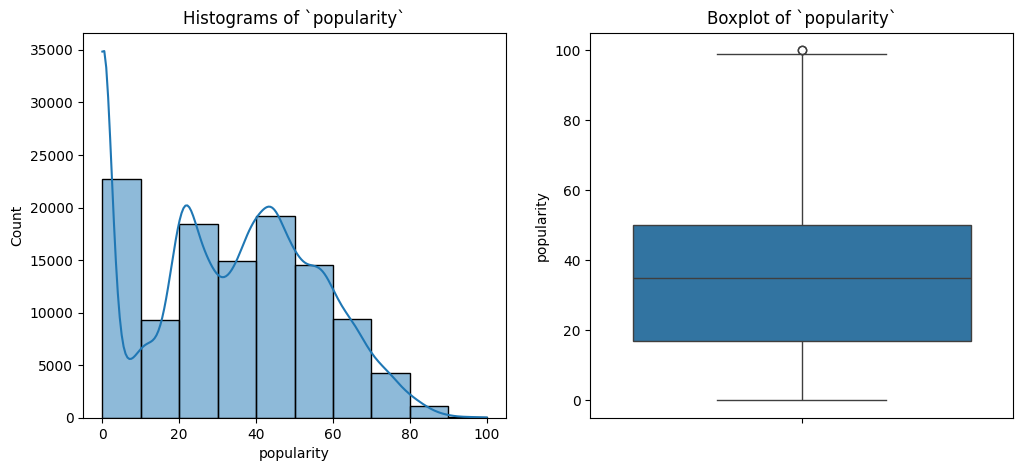

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['popularity'], bins=10, kde=True)
plt.title("Histograms of `popularity`")

plt.subplot(1, 2, 2)
sns.boxplot(y=data['popularity'])
plt.title("Boxplot of `popularity`")

plt.show()

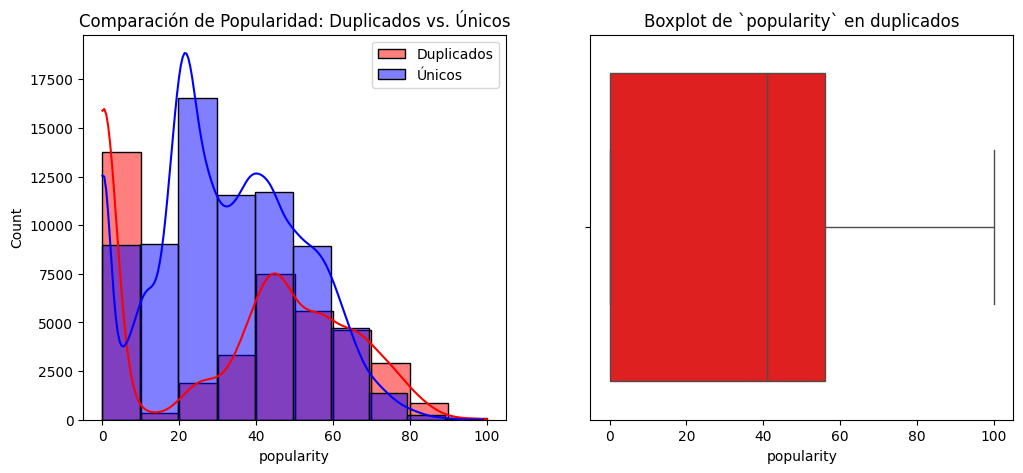

In [ ]:
duplicates = data[data.duplicated('track_id', keep=False)]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(duplicates['popularity'], bins=10, kde=True, color='red', label='Duplicados')
sns.histplot(data[~data.duplicated('track_id', keep=False)]['popularity'], bins=10, kde=True, color='blue', label='Únicos', alpha=0.5)
plt.legend()
plt.title("Comparación de Popularidad: Duplicados vs. Únicos")

plt.subplot(1, 2, 2)
sns.boxplot(x=duplicates['popularity'], color='red')
plt.title("Boxplot de `popularity` en duplicados")

plt.show()

scar las media de cada una de los tracks_id en la columand e popularyt, para depues cetgrorizarlas ya que como vismo esn la garfica es mejor opcion apra sacilotarel anlis es mejor categorizar

In [ ]:
def calculate_and_categorize_popularity(data_filter, original_data):
    """
    Calculate mean popularity for each track_id and categorize it.

    Args:
        data_filter (pd.DataFrame): DataFrame from group_genres_by_track_id.
        original_data (pd.DataFrame): Original DataFrame with popularity values.

    Returns:
        pd.DataFrame: DataFrame with popularity_mean and popularity_category.
    """
    # Calcular la media de popularity desde los datos originales
    df_popularity = (
        original_data.groupby("track_id")["popularity"]
        .mean()
        .reset_index()
        .rename(columns={"popularity": "popularity_mean"})
    )

    # Combinar con el DataFrame agrupado y eliminar la columna popularity original
    df_result = data_filter.drop(columns=["popularity"], errors="ignore").merge(
        df_popularity, on="track_id", how="left"
    )

    # Categorizar popularity_mean
    bins = [0, 20, 40, 60, 80, 100]
    labels = ["Very Low", "Low", "Medium", "High", "Very High"]
    df_result["popularity_category"] = pd.cut(
        df_result["popularity_mean"],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

    return df_result
data_filter = calculate_and_categorize_popularity(data_filter, data)


In [ ]:
data_filter

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,214240,False,0.688,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4,acoustic,Media
1,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,189613,False,0.625,0.414,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.669,130.088,4,acoustic,Alta
2,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,242946,False,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,4,acoustic,Alta
3,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Media
4,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113544,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,241826,False,0.526,0.487,1,-10.204,0,0.0725,0.6810,0.000000,0.0893,0.708,79.198,4,world-music,Baja
113545,3FjOBB4EyIXHYUtSgrIdY9,Jesus Culture,Revelation Songs,Your Love Never Fails,312566,False,0.475,0.860,10,-4.722,1,0.0421,0.0065,0.000002,0.2460,0.427,113.949,4,world-music,Baja
113546,4OkMK49i3NApR1KsAIsTf6,Chris Tomlin,See The Morning (Special Edition),How Can I Keep From Singing,256026,False,0.505,0.687,10,-4.375,1,0.0287,0.0841,0.000000,0.1880,0.382,104.083,3,world-music,Baja
113547,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",305454,False,0.331,0.171,1,-15.668,1,0.0350,0.9200,0.022900,0.0679,0.327,132.147,3,world-music,Baja


In [ ]:
data_filter = group_genres_by_track_id(data_filter)

/tmp/ipykernel_51115/1319443283.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = chunk.groupby(except_track_genre)["track_genre"].agg(


MemoryError: Unable to allocate 4.80 PiB for an array with shape (5400000000000000,) and data type int8

In [ ]:
a = data_filter["track_id"].value_counts()
a

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64'])


for col in numerical_cols:
    print(f"\n--- Handling Outliers for {col} ---")

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    print(f"Number of Outliers: {len(outliers)}")




#### colcusiones 


## visualizations:

In [ ]:
data.hist(figsize=(12, 8), bins=30, color="skyblue", edgecolor="black", alpha=0.75, grid=True, linewidth=1.2)
plt.suptitle("Histograms of Dataset Features", fontsize=16, fontweight="bold", color="darkblue")
plt.tight_layout()

plt.show()

In [ ]:
artists_ten_count = data["artists"].value_counts().head(10)

plt.figure(figsize=(12, 8)) 
ax = sns.barplot(x=artists_ten_count.values, y=artists_ten_count.index, palette="viridis")

x_limit = ax.get_xlim()[1]

for index, value in enumerate(artists_ten_count.values):
    plt.Text(value, index, f"{value}", va ="center", ha="left", fontsize=12, color="black", fontweight="bold")

plt.title("Top 10 Most Popular Artists", fontsize=14, fontweight="bold")
plt.xlabel("Artits", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
album_name_ten_count = data["album_name"].value_counts().head(10)

plt.figure(figsize=(12, 8)) 
ax = sns.barplot(x=album_name_ten_count.values, y=album_name_ten_count.index, palette="viridis")

x_limit = ax.get_xlim()[1]

for index, value in enumerate(album_name_ten_count.values):
    plt.Text(value, index, f"{value}", va ="center", ha="left", fontsize=12, color="black", fontweight="bold")

plt.title("Top 10 Most Popular Album", fontsize=14, fontweight="bold")
plt.xlabel("Artits", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
track_name_ten_count = data["track_name"].value_counts().head(10)

plt.figure(figsize=(12, 8)) 
ax = sns.barplot(x=track_name_ten_count.values, y=track_name_ten_count.index, palette="viridis")

x_limit = ax.get_xlim()[1]

for index, value in enumerate(track_name_ten_count.values):
    plt.Text(value, index, f"{value}", va ="center", ha="left", fontsize=12, color="black", fontweight="bold")

plt.title("Top 10 Most Popular Track", fontsize=14, fontweight="bold")
plt.xlabel("Artits", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
track_genre_ten_count = data["track_genre"].value_counts().head(10)

plt.figure(figsize=(12, 8)) 
ax = sns.barplot(x=track_genre_ten_count.values, y=track_genre_ten_count.index, palette="viridis")

x_limit = ax.get_xlim()[1]

for index, value in enumerate(track_genre_ten_count.values):
    plt.Text(value, index, f"{value}", va ="center", ha="left", fontsize=12, color="black", fontweight="bold")

plt.title("Top 10 Most Popular Track Genre ", fontsize=14, fontweight="bold")
plt.xlabel("Artits", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
explicit = data["explicit"].value_counts()

def func(pct, all_vals):
    absolute =  int(round(pct/100. *sum(all_vals)))
    return f"{absolute}\n({pct:.1f}%)"

plt.Figure(figsize=(12, 8))
plt.pie(explicit, labels = explicit.index, autopct=lambda pct: func(pct, explicit), colors=["#552583", "#FDB927",], wedgeprops={'edgecolor': 'black'})
plt.title("Number of Songs with Explicit Content")
plt.show()

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col], color='skyblue')  
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.xlabel('Valores', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    print(f"\n--- Handling Outliers for {col} ---")

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    print(f"Number of Outliers: {len(outliers)}")



In [ ]:
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix of All Columns')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables numéricas
numericas = [
    'popularity', 'duration_ms', 'danceability', 'energy', 'key',
    'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'
]

X = data[numericas]
X_scaled = StandardScaler().fit_transform(X)

# Ajustar PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Crear dataframe con componentes
df_pca = pd.DataFrame(components, columns=['PC1', 'PC2'])


In [ ]:
# Agregar variable categórica para colorear (ej: track_genre o explicit)
df_pca['genre'] = data['track_genre']  # o df['explicit'], etc.

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca.sample(1000), x="PC1", y="PC2", hue="genre", alpha=0.6, palette="tab10")
plt.title("PCA - Individuals (colored by genre)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Cargar pesos de las variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(8, 8))
for i, var in enumerate(numericas):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.7)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, var, ha='center', va='center')

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.title("PCA - Variable Plot (Loadings)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))

# Individuals
sns.scatterplot(
    x=components[:, 0], y=components[:, 1],
    hue=data['track_genre'], alpha=0.6, palette="tab10",
    s=40, edgecolor='k', linewidth=0.2
)

# Variables (arrows)
for i, var in enumerate(numericas):
    plt.arrow(0, 0, loadings[i, 0]*5, loadings[i, 1]*5, color='black', alpha=0.6)
    plt.text(loadings[i, 0]*5.2, loadings[i, 1]*5.2, var, color='black', ha='center', va='center')

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot: Individuals & Variables (colored by genre)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()
